In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
#function definitions
def find_w_star(x,y,LAMBDA):
    xtx=x.T.dot(x) 
    xty=x.T.dot(y)    
    xtx_plus_LAMBDA_inv=np.linalg.inv(xtx+(LAMBDA*np.eye(x.shape[1])))
    w_star=xtx_plus_LAMBDA_inv.dot(xty)
    return w_star

def find_MSE(x,y,w):
    return (y-x.dot(w)).T.dot((y-x.dot(w)))/x.shape[0]

In [3]:
#A1.3.3
df=pd.read_csv("out/3.1/Dataset_3_meanfill.csv",header=None)

In [4]:
df=df.iloc[:,5:128]
col_ones = pd.DataFrame(np.ones((1994,1)))
df.insert(loc=0, column='4', value=col_ones)

In [5]:
LAMBDA_axis=[]
for LAMBDA_H in range(0,100):
    LAMBDA=LAMBDA_H/20.0
    LAMBDA_axis.append(LAMBDA)
    MSE_trn_5=[]
    MSE_tst_5=[]
    w_star_5=[]
    for i in range(1,6):
        #read training dataset_i
        path="out/3.2/CandC/CandC-train"
        path=path+str(i)+".csv"
        df=pd.read_csv(path)
        x=df.iloc[:,0:123]
        x=np.array(x)
        y=df.iloc[:,123:]
        y=np.array(y)
        #compute w_star parameter for min loss
        w_star=find_w_star(x,y,LAMBDA)
        #Compute minimal MSE_trn
        MSE_trn=find_MSE(x,y,w_star)
        #read testing dataset_i
        path="out/3.2/CandC/CandC-test"
        path=path+str(i)+".csv"
        df=pd.read_csv(path)
        x=df.iloc[:,0:123]
        x=np.array(x)
        y=df.iloc[:,123:]
        y=np.array(y)
        #Compute minimal MSE_tst
        MSE_tst=find_MSE(x,y,w_star)
        #push the results in list
        w_star_5.append(w_star)
        MSE_trn_5.append(MSE_trn)
        MSE_tst_5.append(MSE_tst)
    #make average of the 5 elements of each list
    w_star_5=np.array(w_star_5)
    w_star_temp=(w_star_5[0]+w_star_5[1]+w_star_5[2]+w_star_5[3]+w_star_5[4])/5.0
    MSE_trn_temp=sum(MSE_trn_5)/float(len(MSE_trn_5))
    MSE_tst_temp=sum(MSE_tst_5)/float(len(MSE_tst_5))
    
    
    if(LAMBDA_H==0):
        w_star_lst=w_star_temp
        MSE_trn_lst=np.array([MSE_trn_temp])
        MSE_tst_lst=np.array([MSE_tst_temp])
    else:
        w_star_lst=np.column_stack((w_star_lst,w_star_temp))
        MSE_trn_lst=np.dstack((MSE_trn_lst,np.array([MSE_trn_temp])))
        MSE_tst_lst=np.dstack((MSE_tst_lst,np.array([MSE_tst_temp])))
        
MSE_trn_lst=MSE_trn_lst.ravel()
MSE_tst_lst=MSE_tst_lst.ravel()

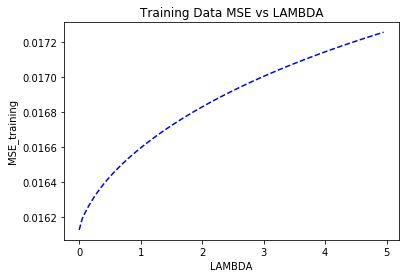

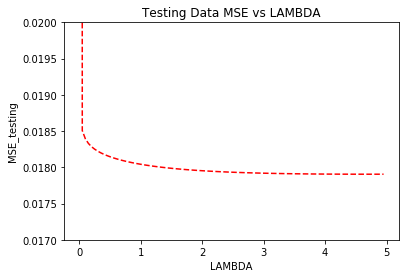

In [6]:
#plot everything
plt.plot(LAMBDA_axis,MSE_trn_lst.T, 'b--')
plt.title('Training Data MSE vs LAMBDA')
plt.ylabel('MSE_training')
plt.xlabel('LAMBDA')
plt.savefig('plots/plot3.3a.png')
plt.show()
plt.plot(LAMBDA_axis,MSE_tst_lst.T, 'r--')
plt.title('Testing Data MSE vs LAMBDA')
plt.ylabel('MSE_testing')
plt.xlabel('LAMBDA')
plt.ylim(0.017,0.02)
plt.savefig('plots/plot3.3b.png')
plt.show()

In [7]:
#find the LAMBDA that gives the lowest error in the validation set
LAMBDA_star=LAMBDA_axis[np.argmin(MSE_tst_lst)]
print "The Minimal MSE of the Testing Set is: ",MSE_tst_lst[np.argmin(MSE_tst_lst)]
print "The LAMBDA that gives the Minimal MSE of the Validation Set is: ",LAMBDA_star

The Minimal MSE of the Testing Set is:  0.0179049621426
The LAMBDA that gives the Minimal MSE of the Validation Set is:  4.7


In [8]:
np.set_printoptions(threshold='nan')
print "w_star of selected model with redularization for given LAMBDA: \n", w_star  
#Save the results into files
with open("out/3.3/3.3_w_star.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(w_star)

w_star of selected model with redularization for given LAMBDA: 
[[  5.67799876e-02]
 [ -2.91598385e-03]
 [  7.70398369e-03]
 [  1.40057203e-01]
 [ -6.54872829e-02]
 [ -8.55434806e-03]
 [  6.87523262e-02]
 [ -2.00757022e-03]
 [ -6.32553510e-02]
 [ -4.10641189e-02]
 [  7.51443435e-02]
 [ -1.15621255e-02]
 [  3.54870574e-02]
 [  2.15942095e-02]
 [ -4.07647490e-02]
 [  2.00800411e-02]
 [ -9.55170443e-02]
 [  4.96340525e-02]
 [  3.68955800e-02]
 [ -5.06593700e-02]
 [  1.30869848e-02]
 [ -1.73219128e-02]
 [ -4.42868361e-02]
 [ -1.65297051e-02]
 [ -3.62751120e-02]
 [  2.42454746e-02]
 [  4.16197247e-02]
 [  2.77587892e-02]
 [ -5.27295659e-03]
 [ -1.64443245e-02]
 [ -6.81750864e-02]
 [  3.90617840e-03]
 [  9.02509399e-03]
 [  4.38987387e-04]
 [  6.65337273e-02]
 [ -3.19579530e-02]
 [ -6.95235809e-03]
 [  2.40860907e-02]
 [  2.25050540e-02]
 [  9.67868092e-02]
 [  6.21804483e-02]
 [ -2.98655003e-02]
 [  1.71805243e-02]
 [  3.48176453e-02]
 [ -5.71997560e-02]
 [ -9.75234707e-02]
 [ -3.10070905e-

In [9]:
import numpy.ma as ma
lt_mdn_msk=ma.masked_less(np.abs(w_star), np.median(np.abs(w_star)))
#Reduce the number of features by removing all the feature that are not above the mean
#train
dftr_r=pd.read_csv("out/3.2/CandC/CandC-train1.csv")
xtr_r=dftr_r.iloc[:,0:123]
xtr_r=np.array(xtr_r)
ytr_r=dftr_r.iloc[:,123:]
ytr_r=np.array(ytr_r)
print ytr_r.shape
#test
dftst_r=pd.read_csv("out/3.2/CandC/CandC-test1.csv")
xtst_r=dftst_r.iloc[:,0:123]
xtst_r=np.array(xtst_r)
ytst_r=dftst_r.iloc[:,123:]
ytst_r=np.array(ytst_r)
#create new dataset by deleting features with a weight less than the median
i=0
for j in lt_mdn_msk.mask:
    if j[0]:
        xtr_r = np.delete(xtr_r, (i), axis=1)
        xtst_r = np.delete(xtst_r, (i), axis=1)
    else:
        i=i+1  

(1594L, 1L)


In [10]:
print xtr_r.shape,ytr_r.shape
w_star_r=find_w_star(xtr_r,ytr_r,0)
MSE_tr_r=find_MSE(xtr_r,ytr_r,w_star_r)
MSE_tst_r=find_MSE(xtst_r,ytst_r,w_star_r)
print "The MSE of the training datasets with reduced dimensionality is: ",MSE_tr_r, "\n","The MSE of the testing datasets with reduced dimensionality is: ",MSE_tst_r

(1594L, 62L) (1594L, 1L)
The MSE of the training datasets with reduced dimensionality is:  [[ 0.0169793]] 
The MSE of the testing datasets with reduced dimensionality is:  [[ 0.01802577]]
